The dataset to be analyzed was found in Kaggle (https://www.kaggle.com/datasets/gregorut/videogamesales/data)
This dataset shows a list of **video games with sales greater than 100,000 copies**.
The sales are listed as millions and the list includes video games sold from 1980 to 2020

In [58]:
# Video Games Sales

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the video games dataset into a dataframe
df = pd.read_csv('vgsales.csv')

In [144]:
# General Comparisons

#Convert Year from float to int
df['Year'] = df['Year'].astype('Int64')

# Top 5 games sold
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Since the dataset was already ordered by rank it wasn't needed an additional function to order the data.
We can see in the results that the most sold video games were published by **Nintendo** and the predominant platform was the **Wii**.
The top sale was from the Wii Sports videogame, which was sold most on **North America and had 82.74 million games sold worldwide**.

Text(0, 0.5, 'Sales')

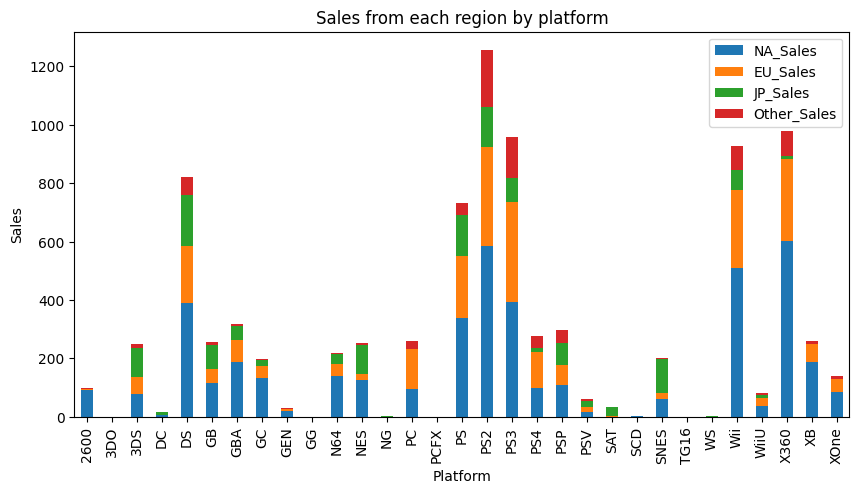

In [86]:
# Sales by platform divided in regions

platform_sales = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

platform_sales.plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('Sales from each region by platform')
plt.xlabel('Platform')
plt.ylabel('Sales')

The previous analysis done with a bar chart shows us the sales per region from each platform.
We can say based on the graph that the **Playstation 2** (PS2) was the platform with more videogames sold between 1980 and 2020 with about 1200 million sales, where the region that it sold more was **North America with about 580 million video games sold**.
Consoles that don't show any visible data are probably consoles that were mostly used in earlier year. However, it seems that the most popular platform from the first years or so of our year range was the Atari 2600.

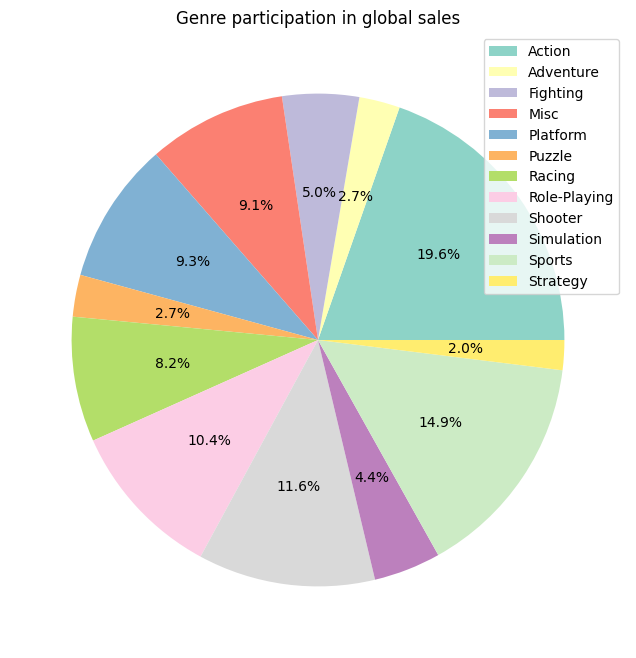

In [53]:
# Genre participation in total sales

genre_sales = df.groupby('Genre')['Global_Sales'].sum()

# Create color palette since there are a lot of genres
colors = plt.cm.Set3.colors

plt.figure(figsize=(8,8))
plt.pie(genre_sales, autopct='%1.1f%%', colors=colors[:len(genre_sales)])

plt.title('Genre participation in global sales')
plt.legend(genre_sales.index, loc='best')
plt.show()

With this previous pie chart I wanted to identify which is the most popular genre of video games among the global sales.
Given the percentages, the most popular genre was **Action (19.6%)** and the less popular is **Strategy (2%)**. We can infere that people are not that interested in games where there is no history and they prefer more adventorous games or games that give them more adrenaline such as action and adventure.

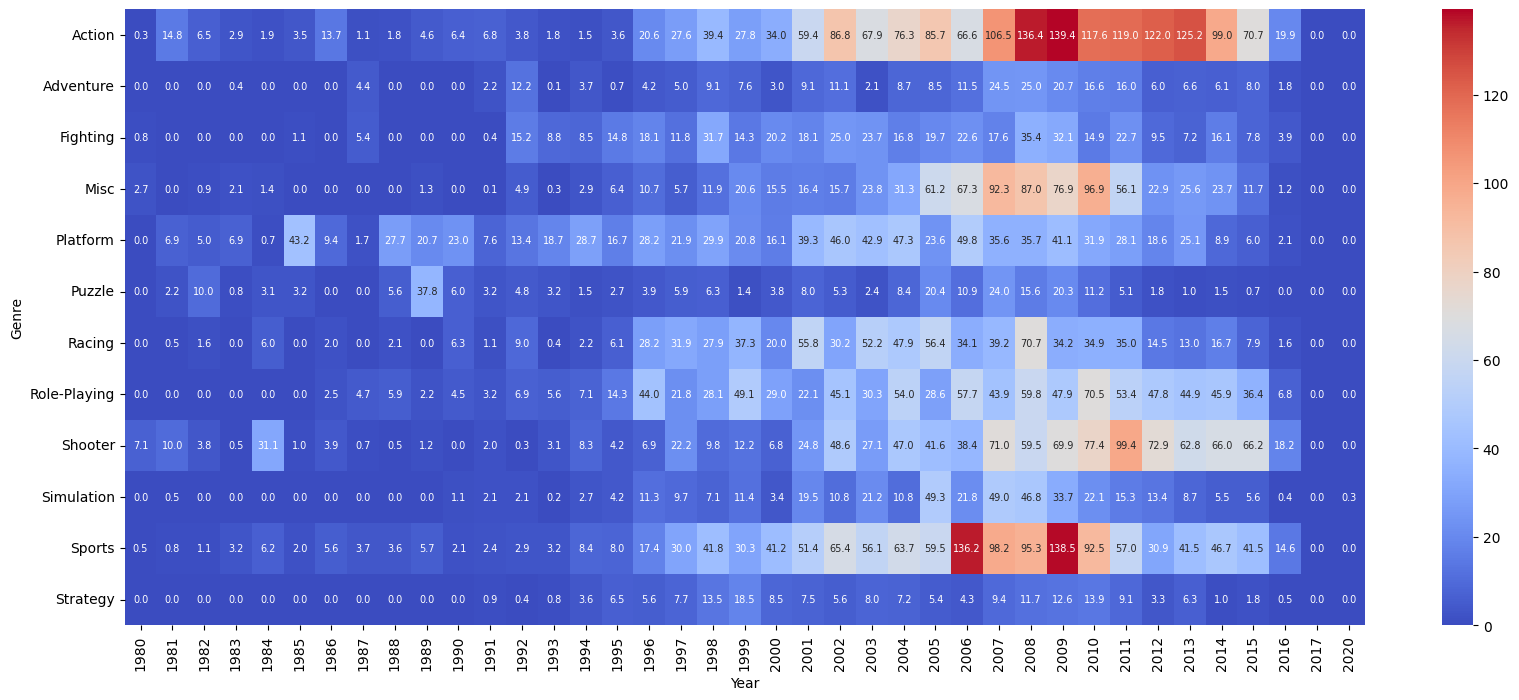

In [84]:
# Heatmap to show intensity of sales for genre each year

#Group by genre and year
sales_genre_year = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
# Create pivot table
pivot_table = sales_genre_year.pivot(index='Genre',columns='Year',values='Global_Sales').fillna(0)

# Create heatmap
plt.figure(figsize=(20,8))
sns.heatmap(pivot_table, annot=True,cmap='coolwarm', fmt='1.1f',annot_kws={"fontsize": 7})
plt.show()

I also created this heatmap to identify in what year each genre was sold the most.
In the years **2006 and 2009 Sports video games peaked**. With a quick Google search I found that in those years many sport video games were released such as Madden NFL 07, NBA Live 07 and WWE Smackdown. Also games such as Grand Theft Auto IV, Uncharted and Super Smash Bros were some of the games released in **2007 and 2008 which made sense since Action games peaked those years**. Also, with the new consoles such as the Xbox 360 and the Playstation 3, it made sense that many games with better graphics were sold from those genres.

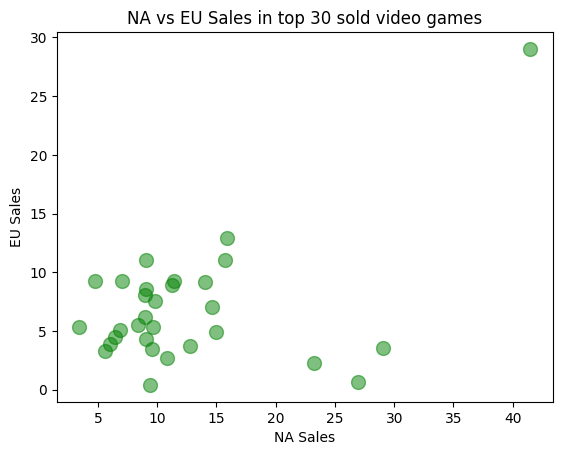

In [137]:
# Relationship between NA and EU sales

top30 = df.head(30)

plt.scatter(top30['NA_Sales'], top30['EU_Sales'], alpha=0.5, color='g', s=100)

plt.title('NA vs EU Sales in top 30 sold video games')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.show()

Lastly, I created a **scatter plot to show the relationship between the top 30 games sold in North America and the European Union.**
For the most sold video game in NA, it seems it also was the most sold video game in the EU, but this is not the same for other video games. We can see many different results for sold games. For instance the videogame that sold about **26 million copies in NA, only sold around 1 million copies in the EU**.
If we dig more into it, that game was New Super Mario Bros release in 2009 for Wii by Nintendo. There could be many reasons why this game was sold more in NA than in the EU. For example, Nintendo consoles were sold more in NA than in the EU, also video games are normally more expensive in the EU than in NA, which could also explain why there aren't a lot of video games in the EU sold as in NA.